# Loading data

In [ ]:
# Standard analytics packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Import useful packages from sklearn
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer as Imputer
from sklearn.model_selection import KFold
import cvxpy as cp

In [ ]:
# Load Life Expectancy dataset
life_expectancy_data = pd.read_csv('https://docs.google.com/uc?export=download&id=1kkTJYlBFuhk2mX1XA_2I0cFFJjIq4QZ4')
# Load drinkning water dataset
drinking_water_data = pd.read_csv('https://docs.google.com/uc?export=download&id=1RffzVDKasXr34EpiyOquDl4OELVSW_wA')
# Human Development Index data
hdi_data = pd.read_csv('https://docs.google.com/uc?export=download&id=1TmL4ft4WNv0KMWSYP97RbZrGJmVXeq9z')


country_continent = pd.read_csv('https://docs.google.com/uc?export=download&id=1miHKjjdJx8nwZ-hQTvTuSPEcoqV4rqr9')

In [ ]:
hdi_data

,Entity,Code,Year,Human Development Index (UNDP)
0,Afghanistan,AFG,1980,0.228
1,Afghanistan,AFG,1985,0.273
2,Afghanistan,AFG,2002,0.373
3,Afghanistan,AFG,2003,0.383
4,Afghanistan,AFG,2004,0.398
...,...,...,...,...
4996,Zimbabwe,ZWE,2013,0.516
4997,Zimbabwe,ZWE,2014,0.525
4998,Zimbabwe,ZWE,2015,0.529
4999,Zimbabwe,ZWE,2016,0.532


In [ ]:
##Dealing with missing data
def remove_num_nans(data, target_columns, strategy):
  '''Takes data, and target columns and replaces NaNs with the chosen strategy.'''

  imp_strategy = Imputer(strategy=strategy)
  imp_strategy.fit(data[target_columns])
  data[target_columns] = imp_strategy.transform(data[target_columns])

In [ ]:
def fill_data_by_country(data, country_column, target_columns, african_nations, strategy):
  '''Takes dataframe, name of the column containing country names, target columns to be filled, list of nations in africa, and a stratgy
     Goes nation by nation and fills missing values with mean. If no mean available, the mean of the entire dataframe is inserted instead.'''

  for i in range(len(african_nations)):
    if african_nations[i] in list(data[country_column]):
      sub_df = data[data[country_column] == african_nations[i]].copy()

      try:
        remove_num_nans(sub_df, target_columns, 'mean')
      except:
        filtered = []
        for val in sub_df[target_columns]:
          if sub_df[val].sum() != 0:
            filtered.append(val)

        remove_num_nans(sub_df, filtered, 'mean')

      data[data[country_column] == african_nations[i]] = sub_df

  remove_num_nans(data, target_columns, strategy)

In [ ]:
life_expectancy_columns = ['Country', 'Year', 'Status', 'Life expectancy ',	'Alcohol',	'percentage expenditure',	'Hepatitis B',	'Measles ',	' BMI ', 'Polio',	'Diphtheria ',	' HIV/AIDS',	'GDP',	'Population', 'Schooling']

country_continent_columns = ['Continent', 'Country']

country_continent
le_eda = pd.merge(life_expectancy_data, country_continent,  how='left', left_on=['Country'], right_on = ['Country'])
le_col = country_continent_columns + life_expectancy_columns
le_col.pop(1)
le_eda = le_eda[le_col]
le_eda

,Continent,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Asia,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210,33736494.0,10.1
1,Asia,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514,327582.0,10.0
2,Asia,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976,31731688.0,9.9
3,Asia,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000,3696958.0,9.8
4,Asia,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231,2978599.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,4.36,0.000000,68.0,31,27.1,67.0,65.0,33.6,454.366654,12777511.0,9.2
2934,Africa,Zimbabwe,2003,Developing,44.5,4.06,0.000000,7.0,998,26.7,7.0,68.0,36.7,453.351155,12633897.0,9.5
2935,Africa,Zimbabwe,2002,Developing,44.8,4.43,0.000000,73.0,304,26.3,73.0,71.0,39.8,57.348340,125525.0,10.0
2936,Africa,Zimbabwe,2001,Developing,45.3,1.72,0.000000,76.0,529,25.9,76.0,75.0,42.1,548.587312,12366165.0,9.8


In [ ]:
##Run this to export to CSV file when EDA is run (Will be found under folder icon)
#compression_opts = dict(method='zip', archive_name='mie368_merged.csv')
#df.to_csv('mie368_merged.zip', index=False, compression=compression_opts)

# EDA

In [ ]:
le_eda

,Continent,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,Polio,Diphtheria,HIV/AIDS,GDP,Population,Schooling
0,Asia,Afghanistan,2015,Developing,65.0,0.01,71.279624,65.0,1154,19.1,6.0,65.0,0.1,584.259210,33736494.0,10.1
1,Asia,Afghanistan,2014,Developing,59.9,0.01,73.523582,62.0,492,18.6,58.0,62.0,0.1,612.696514,327582.0,10.0
2,Asia,Afghanistan,2013,Developing,59.9,0.01,73.219243,64.0,430,18.1,62.0,64.0,0.1,631.744976,31731688.0,9.9
3,Asia,Afghanistan,2012,Developing,59.5,0.01,78.184215,67.0,2787,17.6,67.0,67.0,0.1,669.959000,3696958.0,9.8
4,Asia,Afghanistan,2011,Developing,59.2,0.01,7.097109,68.0,3013,17.2,68.0,68.0,0.1,63.537231,2978599.0,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Africa,Zimbabwe,2004,Developing,44.3,4.36,0.000000,68.0,31,27.1,67.0,65.0,33.6,454.366654,12777511.0,9.2
2934,Africa,Zimbabwe,2003,Developing,44.5,4.06,0.000000,7.0,998,26.7,7.0,68.0,36.7,453.351155,12633897.0,9.5
2935,Africa,Zimbabwe,2002,Developing,44.8,4.43,0.000000,73.0,304,26.3,73.0,71.0,39.8,57.348340,125525.0,10.0
2936,Africa,Zimbabwe,2001,Developing,45.3,1.72,0.000000,76.0,529,25.9,76.0,75.0,42.1,548.587312,12366165.0,9.8


In [ ]:
# Determine which continent has the highest proportion of developing countries
le_eda.groupby(['Continent', 'Status']).size().idxmax()

('Africa', 'Developing')

In [ ]:
NaN_check1 = le_eda.isna().sum().sum()
print(f'There are {NaN_check1} missing values throughout all dataframes')

There are 2446 missing values throughout all dataframes


Text(0, 0.5, 'Average life expectancy (years)')

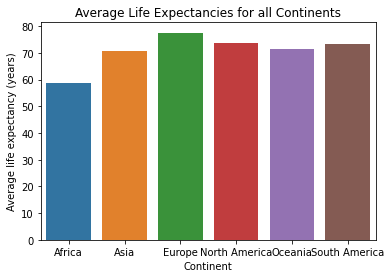

In [ ]:
# Show the average life expectancy for each continent
continents = ['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America']
fill_data_by_country(le_eda, 'Continent', ['Life expectancy '], continents, 'mean')

le_averages = []


for continent in range(len(continents)):
  total = 0
  n_rows = 0
  for row in range(len(le_eda)):
    if le_eda.iloc[row, 0] == continents[continent]:
      total += le_eda.iloc[row, 4]
      n_rows += 1
  average_le = total / n_rows
  le_averages.append(average_le)

df_averages = pd.DataFrame(data = le_averages,
                  index = continents,
                  columns = ['Average life expectancy'])

plot = sns.barplot(x = continents, y = le_averages)
plt.title('Average Life Expectancies for all Continents')
plt.xlabel('Continent')
plt.ylabel('Average life expectancy (years)')

In [ ]:
df_averages

,Average life expectancy
Africa,58.669388
Asia,70.846071
Europe,77.571053
North America,73.564687
Oceania,71.549306
South America,73.456875


In [ ]:
def filter_africa(data, column, africa_list):
  '''Takes dataframe, column name and list of african nations, and filters all non african nations out.'''

  for i in data[column]:
    if i not in africa_list:
      data.drop(data[data[column] == i].index, inplace = True)

  return data


In [ ]:
african_countries = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Democratic Republic of Congo', 'Congo, Dem. Rep.', 'Democratic Republic of the Congo', 'Congo (Dem. Republic)', 'Cote d\'Ivoire', 'Ivory Coast', 'Côte d\'Ivoire', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sahrawi Arab Democratic Republic', 'Sao Tome and Principe', 'São Tomé and Príncipe', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Western Sahara', 'Zambia', 'Zimbabwe']

##Life expectancy EDA
life_expectancy_columns = ['Country', 'Year', 'Status', 'Life expectancy ',	'Alcohol',	'percentage expenditure',	'Hepatitis B',	'Measles ',	' BMI ', 'Polio',	'Diphtheria ',	' HIV/AIDS',	'GDP',	'Population', 'Schooling']
life_expectancy_data = life_expectancy_data[life_expectancy_columns].copy()
filter_africa(life_expectancy_data, 'Country', african_countries)
life_expectancy_data = life_expectancy_data.reset_index().drop(columns='index')

##Drinking water EDA
water_columns = ['Entity', 'Year', 'Access to basic drinking water', 'Access to basic sanitation services', 'Access to basic handwashing facilities']
drinking_water_data = drinking_water_data[water_columns].copy()
filter_africa(drinking_water_data, 'Entity', african_countries)
drinking_water_data = drinking_water_data.reset_index().drop(columns='index')

#Human development index
hdi_columns = ['Entity', 'Year', 'Human Development Index (UNDP)']
hdi_data = hdi_data[hdi_columns].copy()
filter_africa(hdi_data, 'Entity', african_countries)
hdi_data = hdi_data.reset_index().drop(columns='index')

print('done')

done


In [ ]:
# make country names consistent
life_expectancy_data = life_expectancy_data.replace(['Côte d\'Ivoire', 'Democratic Republic of the Congo'], ['Ivory Coast', 'Democratic Republic of Congo'])
drinking_water_data = drinking_water_data.replace(['Cote d\'Ivoire'], ['Ivory Coast'])
hdi_data = hdi_data.replace(['Cote d\'Ivoire'], ['Ivory Coast'])


print('done')

done


**Merging**

In [ ]:
# merging datasets

df_1 = pd.merge(life_expectancy_data, drinking_water_data,  how='left', left_on=['Country','Year'], right_on = ['Entity','Year'])
df_col = life_expectancy_columns + water_columns
df_col.pop(15)
df_col.pop(15)
df_1 = df_1[df_col]

df = pd.merge(df_1, hdi_data,  how='left', left_on=['Country','Year'], right_on = ['Entity','Year'])
df_col = df_col + hdi_columns
df_col.pop(18)
df_col.pop(18)
df = df[df_col]

#Renaming some columns to better describe what they are representing
df.rename(columns = {'Hepatitis B':'Hepatitis B Vaccines', 'Measles ':'Measles Cases', 'Polio ':'Polio Vaccines', 'Diphtheria ':'Diphtheria Vaccines', ' HIV/AIDS':' HIV/AIDS Cases'}, inplace = True)

df

,Country,Year,Status,Life expectancy,Alcohol,percentage expenditure,Hepatitis B Vaccines,Measles Cases,BMI,Polio,Diphtheria Vaccines,HIV/AIDS Cases,GDP,Population,Schooling,Access to basic drinking water,Access to basic sanitation services,Access to basic handwashing facilities,Human Development Index (UNDP)
0,Algeria,2015,Developing,75.6,NaN,0.000000,95.0,63,59.5,95.0,95.0,0.1,4132.762920,39871528.0,14.4,93.41,86.74,83.98,0.749
1,Algeria,2014,Developing,75.4,0.01,54.237318,95.0,0,58.4,95.0,95.0,0.1,547.851700,39113313.0,14.4,93.19,86.87,83.83,0.747
2,Algeria,2013,Developing,75.3,0.53,544.450743,95.0,25,57.2,95.0,95.0,0.1,5471.866766,38338562.0,14.4,92.97,86.99,83.68,0.745
3,Algeria,2012,Developing,75.1,0.66,555.926083,95.0,18,56.1,95.0,95.0,0.1,5564.825660,37565847.0,14.4,92.75,87.09,83.52,0.740
4,Algeria,2011,Developing,74.9,0.56,509.002041,95.0,112,55.0,95.0,95.0,0.1,5432.252300,36819558.0,14.0,92.51,87.19,83.36,0.736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Zimbabwe,2004,Developing,44.3,4.36,0.000000,68.0,31,27.1,67.0,65.0,33.6,454.366654,12777511.0,9.2,70.69,44.88,NaN,0.428
812,Zimbabwe,2003,Developing,44.5,4.06,0.000000,7.0,998,26.7,7.0,68.0,36.7,453.351155,12633897.0,9.5,71.21,44.86,NaN,0.428
813,Zimbabwe,2002,Developing,44.8,4.43,0.000000,73.0,304,26.3,73.0,71.0,39.8,57.348340,125525.0,10.0,71.71,44.82,NaN,0.435
814,Zimbabwe,2001,Developing,45.3,1.72,0.000000,76.0,529,25.9,76.0,75.0,42.1,548.587312,12366165.0,9.8,72.02,44.63,NaN,0.442


In [ ]:
df['Human Development Index (UNDP)'].mean()

0.48918361955085865

In [ ]:
NaN_check2 = df.isna().sum().sum()
print(f'There are {NaN_check2} missing values throughout merged df')

There are 1157 missing values throughout merged df


In [ ]:
drop_for_X = ['Country', 'Year', 'Status', 'Schooling', 'GDP', 'Life expectancy ', 'Alcohol', 'Human Development Index (UNDP)', 'Population', 'percentage expenditure', 'Measles Cases']

df_nums = df.columns[3:]
df_cats = df.columns[:3]

kf = KFold(n_splits=5)

train_score_list = []
test_score_list = []
betas = []
y_predictions = []
corrs = []

for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index].copy(), df.iloc[test_index].copy()

    fill_data_by_country(df_train, 'Country', df_nums, african_countries, 'mean')
    fill_data_by_country(df_test, 'Country', df_nums, african_countries, 'mean')

    df_train['Sqrt Population'] = np.sqrt(df_train['Population'])
    df_test['Sqrt Population'] = np.sqrt(df_test['Population'])

    df_train['Sqrt Percentage expenditure'] = np.sqrt(df_train['percentage expenditure'])
    df_test['Sqrt Percentage expenditure'] = np.sqrt(df_test['percentage expenditure'])

    df_train['Sqrt Measles Cases'] = np.sqrt(df_train['Measles Cases'])
    df_test['Sqrt Measles Cases'] = np.sqrt(df_test['Measles Cases'])

    df_train['Sqrt GDP'] = np.sqrt(df_train['GDP'])
    df_test['Sqrt GDP'] = np.sqrt(df_test['GDP'])

    X_train = df_train.drop(columns = drop_for_X)
    y_train = df_train['Human Development Index (UNDP)']

    X_test = df_test.drop(columns = drop_for_X)
    y_test = df_test['Human Development Index (UNDP)']

    linreg = LinearRegression()
    linreg.fit(X_train, y_train)

    y_test_predictions = linreg.predict(X_test)
    y_predictions.append(y_test_predictions.mean())

    train_score = linreg.score(X_train, y_train)
    test_score = linreg.score(X_test, y_test)

    train_score_list.append(train_score)
    test_score_list.append(test_score)

    betas_iter = pd.Series(linreg.coef_, index=X_train.columns)
    betas_iter = betas_iter.append(pd.Series({"Intercept": linreg.intercept_}))
    betas.append(betas_iter)

    corr = df_train.corr().abs()
    corrs.append(corr)


betas = pd.Series(betas)
print(f'Train Score: {sum(train_score_list)/len(train_score_list)}')
print(f'Test Score: {sum(test_score_list)/len(test_score_list)}')
betas = sum(betas)/len(betas)
betas = pd.Series(betas)
print(f'\nBetas:\n\n{betas}')
y_predictions = sum(y_predictions)/len(y_predictions)
print(f'\ny_prediction: {y_predictions}')

Train Score: 0.7743461152132388
Test Score: 0.6656191587177214

Betas:

Hepatitis B Vaccines                     -2.313982e-04
 BMI                                      7.272970e-04
Polio                                     9.963368e-07
Diphtheria Vaccines                       3.027572e-04
 HIV/AIDS Cases                          -5.345219e-04
Access to basic drinking water            1.592556e-03
Access to basic sanitation services       1.501383e-03
Access to basic handwashing facilities    1.012386e-03
Sqrt Population                           1.588725e-06
Sqrt Percentage expenditure               1.242261e-03
Sqrt Measles Cases                       -1.154057e-05
Sqrt GDP                                  8.610491e-04
Intercept                                 2.494715e-01
dtype: float64

y_prediction: 0.4873151080598591


Text(0.5, 0, 'Beta Value Magnitude')

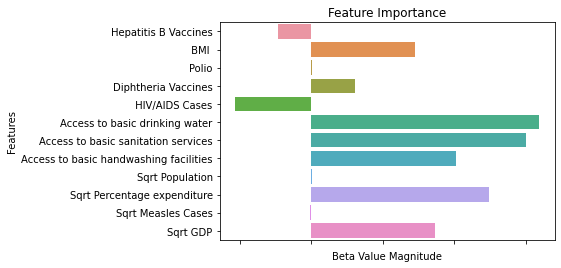

In [ ]:
betas_df = betas.to_frame('beta_vals')

betas_df.drop(labels=['Intercept'], axis=0, inplace=True)

plot = sns.barplot(data = betas_df, y = betas_df.index, x = betas_df.iloc[:,0])
plot.set_xticklabels(plot.get_xticklabels(), rotation=40, ha="right")

plt.title('Feature Importance')
plt.ylabel('Features')
plt.xlabel('Beta Value Magnitude')

In [ ]:
feature_F_scores, _ = f_classif(X_train, y_train)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
  for f2_index, f2 in enumerate(X_train.columns[f1_index + 1:]):
    # Multiply the two features to create a new feature
    new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)
    # Evaluate F-value of new feature
    F_Score_new, p_value_new = f_classif(new_feature, y_train)
    # Evaluate the relative improvement of the new feature
    F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])
    # Print out features that is sufficiently improved
    if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
     #   '''Note that F_score_improvement >= 1.5 and F_Score_new[0] >= 75 is
     #    relatively arbitrary, and that other values could be used.'''
      print(f'{f1} + {f2} has an F-score of {F_Score_new[0]:.2f}')
      print(f'\tBetter by a factor of {F_score_improvement:.2f} over features in isolation')
      print(f'\tThe result is significant (p = {p_value_new})')

IndexError: ignored

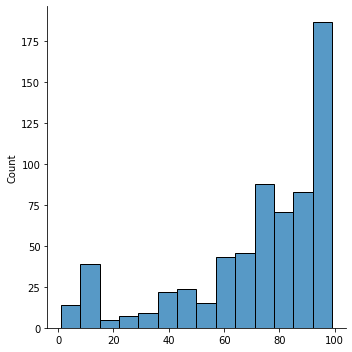

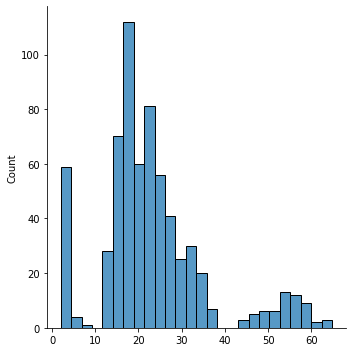

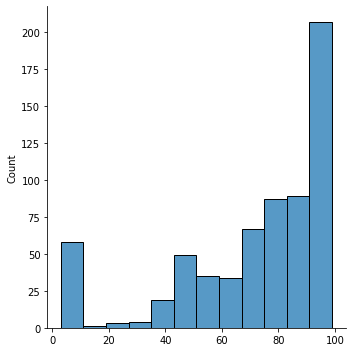

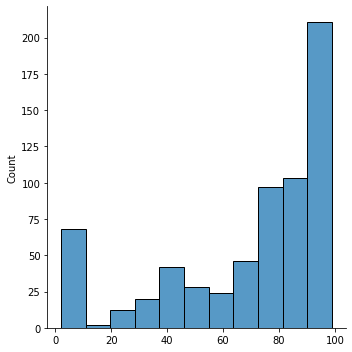

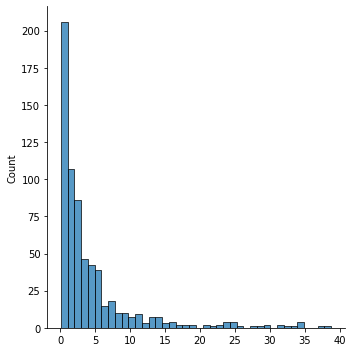

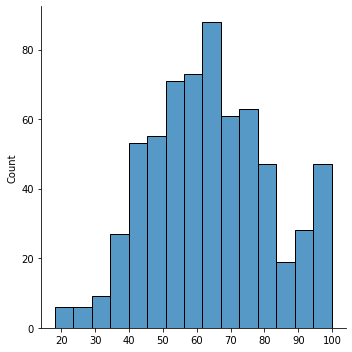

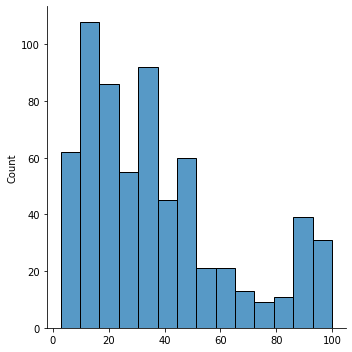

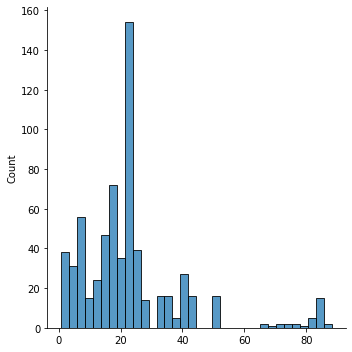

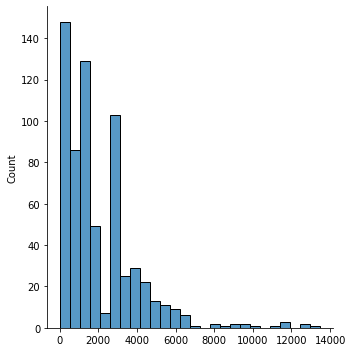

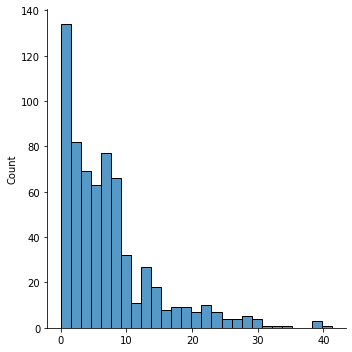

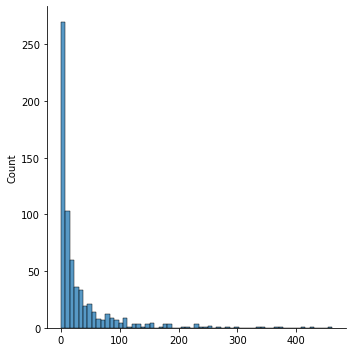

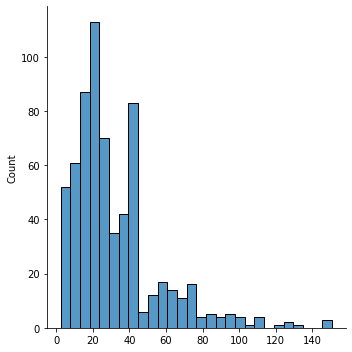

In [ ]:
# check for any skewed features
for feature in range(len(X_train.iloc[0:,])):
  X = []
  for i in range(len(X_train.iloc[:,0])):
    X.append(i)

  Y = []
  for i in range(len(X_train.iloc[:,feature])):
    Y.append(X_train.iloc[i,feature])

  k = sorted(Y)

  sns.displot(data=k)
  #plt.title(df.index(feature))

# Prediction

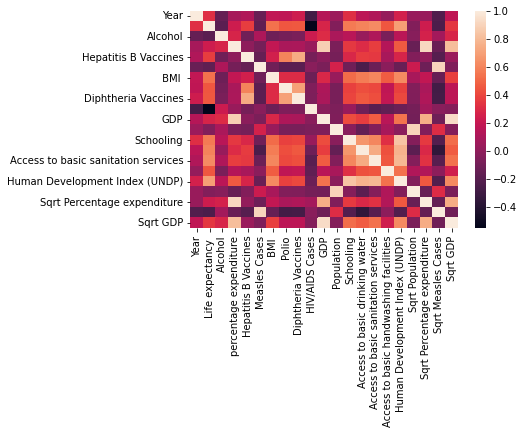

In [ ]:
corr = sum(corrs)/len(corrs)
corr = corr[corr > 0.99]

# Plot correlation coefficents in heat map
drop_for_corr = ['Country']
df_corre = df_train.drop(columns=drop_for_corr).corr()

sns.heatmap(df_corre,annot=False)
plt.show()


# Optimization

In [ ]:
betas_df_opt = betas_df.transpose().copy()
# exclude BMI
betas_df_opt = betas_df_opt[['Hepatitis B Vaccines', 'Sqrt Measles Cases',
                             'Polio', 'Diphtheria Vaccines', ' HIV/AIDS Cases',
                             'Access to basic drinking water',
                             'Access to basic sanitation services',
                             'Access to basic handwashing facilities']]

# Define decision variables
x = cp.Variable(len(betas_df_opt.columns), boolean = False)

# Define objective function
obj = cp.Maximize(x@abs(betas_df_opt.transpose()))

#------------------------------------------------------------------------------#

C = [0.2,1.68,0.78,77.5,11,3.0356,36.1174,0.17] # costs

cons = []

cons.append(x >= 0)        # non-negativity
cons.append(x@C <= 130)    # budgetary constraint

# maximum demand constraints
cons.append(x[0] <= 18.889469) # hep b vaccines
cons.append(x[1] <= 6.683868)  # measles vaccines
cons.append(x[2] <= 12.91398) # polio vaccines
cons.append(x[3] <= 12.483514) # diphtheria vaccines
cons.append(x[4] <= 2.57) # HIV/AIDS treatment
cons.append(x[5] <= 41.8) # drinking water access
cons.append(x[6] <= 77.9) # sanitation services
cons.append(x[7] <= 108.66924) # handwashing services

# maximum funding allocation constraint
for i in range(len(betas_df_opt.columns)):
  cons.append(x[i]*C[i]/130 <= 0.15)

#------------------------------------------------------------------------------#

# solve the model
prob = cp.Problem(obj,cons)
prob.solve(verbose=False)

x_np_array = x.value.astype(float)
x_values = pd.Series(x_np_array, index = betas_df_opt.columns)
print('Optimal resource allocation:\n\n', x_values)

Optimal resource allocation:

 Hepatitis B Vaccines                       18.889469
Sqrt Measles Cases                          6.683868
Polio                                      12.913969
Diphtheria Vaccines                         0.251613
 HIV/AIDS Cases                             1.772727
Access to basic drinking water              6.423771
Access to basic sanitation services         0.539906
Access to basic handwashing facilities    108.669240
dtype: float64


In [ ]:
maxes = [18.889469, 6.683868, 12.91398, 12.483514, 2.57, 41.8, 77.9, 108.66924]
demand_results = []

for i in range(len(x_values)):
  if round(x_values[i], 6) == round(maxes[i], 6) or round(x_values[i],6) == 0:
    demand_results.append("Binding")
  else:
    demand_results.append("Not Binding")


C = [0.2, 1.68, 0.78, 77.5, 11, 3.0356, 36.1174, 0.17]

allocation_results = []
for i in range(len(x_values)):
  if round((x_values[i] * C[i])/130, 2) == 0.15 or round((x_values[i] * C[i])/130, 2) == 0:
    allocation_results.append("Binding")
  else:
    allocation_results.append("Not Binding")

sensitivity = pd.DataFrame(index=x_values.index)
sensitivity["Demand Constraints"] = demand_results
sensitivity["Allocation Constraints"] = allocation_results

sensitivity

,Demand Constraints,Allocation Constraints
Hepatitis B Vaccines,Binding,Not Binding
Sqrt Measles Cases,Binding,Not Binding
Polio,Not Binding,Not Binding
Diphtheria Vaccines,Not Binding,Binding
HIV/AIDS Cases,Not Binding,Binding
Access to basic drinking water,Not Binding,Binding
Access to basic sanitation services,Not Binding,Binding
Access to basic handwashing facilities,Binding,Not Binding
